# DATA 607 - Machine Learning - Summer 2025

## Class 7 — 2025.07.28 — Random Forest Classifiers. Boosting.


In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import (
    cross_val_score,
    RepeatedKFold,
    GridSearchCV,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### Random Forest Classifier

In [68]:
X = pd.read_csv("fashion-mnist/fashion-mnist_train.csv")
y = X.pop("label")
print(f"{X.shape=}, {y.shape=}")

X.shape=(60000, 784), y.shape=(60000,)


In [ ]:
model = RandomForestClassifier(
    n_estimators=200, oob_score=True, max_features=100, max_samples=20_000, n_jobs=-1
)
model.fit(X, y)
print(f"{model.oob_score_=}")

model.oob_score_=0.8772333333333333


### Boosting

In [74]:
def f(x):
    # fmt: off
    c = np.array([ 8.89790000e-01, -1.24853715e01, 2.00598302e02, -1.20027425e03, 3.59728524e03, -5.91118526e03, 5.35786134e03, -2.49811475e03, 4.66314753e02])
    # fmt: on
    return sum(ci * x**i for i, ci in enumerate(c))


def make_data(n, scale=0.07, rng=None):
    rng = np.random.default_rng(rng)
    x = rng.uniform(size=n)
    e = rng.normal(scale=scale, size=n)
    y = f(x) + e
    return x, y

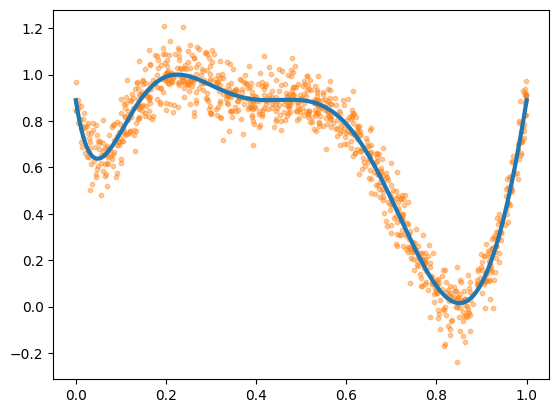

In [76]:
x_train, y_train = make_data(1000)
g = np.linspace(0, 1, 1000)

plt.plot(g, f(g), lw=3)
plt.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
plt.show()

### Boosting regression trees

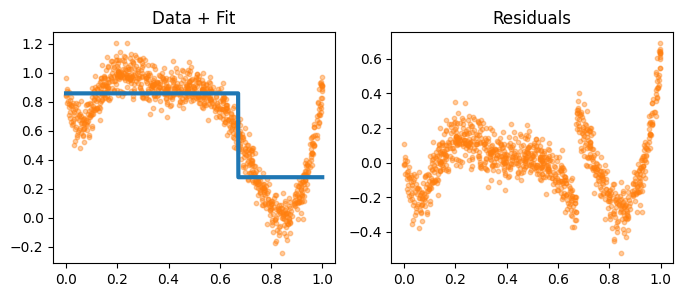

In [77]:
X_train = x_train.reshape(-1, 1)
G = g.reshape(-1, 1)

model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)
r = y_train - model.predict(X_train)
fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(g, model.predict(G), lw=3)
a0.set_title("Data + Fit")
a1.scatter(x_train, r, s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

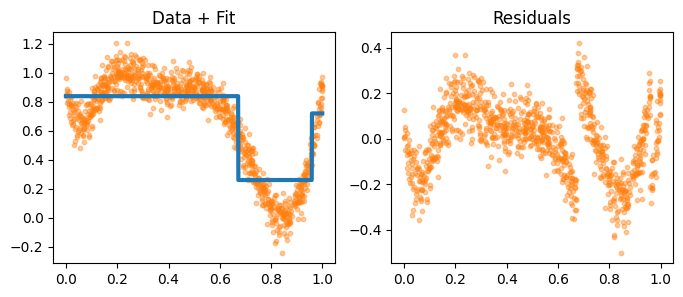

In [78]:
model1 = DecisionTreeRegressor(max_depth=1)
model1.fit(X_train, r)
r = r - model1.predict(X_train)
fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(g, model.predict(G) + model1.predict(G), lw=3)
a0.set_title("Data + Fit")
a1.scatter(x_train, r, s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

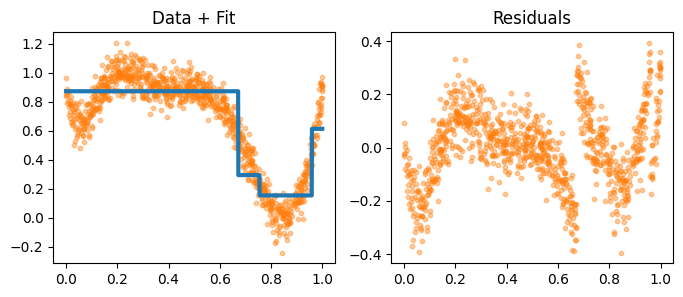

In [79]:
model2 = DecisionTreeRegressor(max_depth=1)
model2.fit(X_train, r)
r = r - model2.predict(X_train)
fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(
    g,
    model.predict(G) + model1.predict(G) + model2.predict(G),
    lw=3,
)
a0.set_title("Data + Fit")
a1.scatter(x_train, r, s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

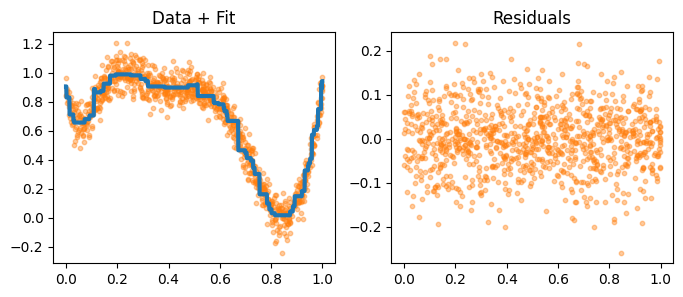

In [80]:
r = y_train.copy()
models = []
n_estimators = 100
for i in range(n_estimators):
    model = DecisionTreeRegressor(max_depth=1)
    models.append(model)
    model.fit(X_train, r)
    r -= model.predict(X_train)

fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(g, sum([model.predict(G) for model in models]), lw=3)
a0.set_title("Data + Fit")
a1.scatter(x_train, r, s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

$$
y = f(x) + (y - f(x))
$$

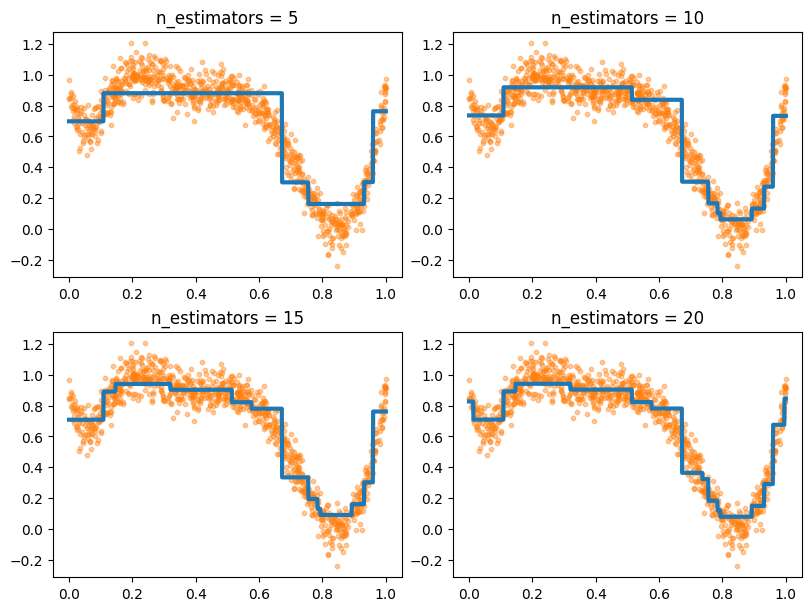

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), layout="constrained")
for k, ax in zip([5, 10, 15, 20], axes.ravel()):
    ax.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
    ax.plot(g, sum([model.predict(G) for model in models[:k]]), lw=3)
    ax.set_title(f"n_estimators = {k}")

In [83]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

X = pd.read_csv("data/auto_preprocessed.csv")
y = X.pop("mpg")

rf_score = cross_val_score(
    RandomForestRegressor(),
    X,
    y,
    scoring="neg_mean_squared_error",
    cv=RepeatedKFold(),
    n_jobs=-1,
).mean()
print(f"{rf_score=}")

rf_score=np.float64(-7.759780356410252)


In [84]:
gb_score = cross_val_score(
    GradientBoostingRegressor(),
    X,
    y,
    scoring="neg_mean_squared_error",
    cv=RepeatedKFold(),
    n_jobs=-1,
).mean()
print(f"{gb_score=}")

gb_score=np.float64(-7.9521903268843515)


In [85]:
hgb_score = cross_val_score(
    HistGradientBoostingRegressor(),
    X,
    y,
    scoring="neg_mean_squared_error",
    cv=RepeatedKFold(),
    n_jobs=-1,
).mean()
print(f"{hgb_score=}")

hgb_score=np.float64(-7.8276844996984005)


In [ ]:
cross_val_score(
    GradientBoostingRegressor(n_estimators=500, learning_rate=0.02, max_features=2),
    X,
    y,
    scoring="neg_mean_squared_error",
    cv=RepeatedKFold(),
    n_jobs=-1,
).mean()

np.float64(-7.727806111627691)

In [ ]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

gb_score = cross_val_score(
    GradientBoostingRegressor(),
    X,
    y,
    scoring="neg_mean_squared_error",
    # cv=RepeatedKFold(),
    n_jobs=-1,
).mean()
print(f"{gb_score=}")

hgb_score = cross_val_score(
    HistGradientBoostingRegressor(learning_rate),
    X,
    y,
    scoring="neg_mean_squared_error",
    # cv=RepeatedKFold(),
    n_jobs=-1,
).mean()
print(f"{hgb_score=}")

gb_score=np.float64(-0.4124554396901335)
hgb_score=np.float64(-0.38458755542767875)


In [92]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [93]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [96]:
model = model = GridSearchCV(
    HistGradientBoostingRegressor(max_iter=200),
    param_grid={"learning_rate": [0.01, 0.1, 1.0], "max_depth": [None, 1, 2, 3]},
    scoring="neg_mean_squared_error",
)
model.fit(X, y)

print(f"{model.best_params_=}, {model.best_score_=}")

model.best_params_={'learning_rate': 0.1, 'max_depth': None}, model.best_score_=np.float64(-0.37224156636656114)


In [98]:
from xgboost import XGBRegressor

model = model = GridSearchCV(
    XGBRegressor(n_estimators=500),
    param_grid={"learning_rate": [0.01, 0.1, 1.0]},
    scoring="neg_mean_squared_error",
)
model.fit(X, y)

print(f"{model.best_params_=}, {model.best_score_=}")

model.best_params_={'learning_rate': 0.01}, model.best_score_=np.float64(-0.40776294280495556)


In [99]:
from lightgbm import LGBMRegressor

model = model = GridSearchCV(
    LGBMRegressor(n_estimators=200, force_col_wise=True, verbose=0),  # type: ignore
    param_grid={"learning_rate": [0.01, 0.1, 1.0]},
    scoring="neg_mean_squared_error",
)
model.fit(X, y)

print(f"{model.best_params_=}, {model.best_score_=}")

model.best_params_={'learning_rate': 0.1}, model.best_score_=np.float64(-0.38626060786406)


### Gradient Boosting

- Suppose we've fit a model $F_0$ to the training data. How might we improve it (***boost*** its performance)?

- Let $L$ be the relevant loss function.

- For ***small adjustments*** $h$,
  $$
  L(F_0 + h) \approx L(F_0) + \left.\frac{\partial L}{\partial F}\right|_{F=F_0}h.
  $$

  - This is ***calculus***; more precisely, ***first-order approximation***.

  - $\displaystyle \left.\frac{\partial L}{\partial F}\right|_{F=F_0}$ is called ***the gradient of $L$ at $F=F_0$***.

- If $\varepsilon$ is a sufficiently small positive number and we set
  $$
  h = -\varepsilon \left.\frac{\partial L}{\partial F}\right|_{F=F_0},
  $$
  then $h$ is a small adjustment, in which case
  $$
  L(F_0 + h) \approx L(F_0)  -\varepsilon \left(\left.\frac{\partial L}{\partial F}\right|_{F=F_0}\right)^2 < L(F_0).
  $$

- Thus, $F_1=F_0 + h$ has smaller training loss that $F_0$.

- Decreasing training loss by adjusting a model along the negative gradient of the loss is called ***gradient descent***. The negative of the gradient of a function points in its direction of ***steepest descent***.

### Deep Learning

[Colab notebook](https://colab.research.google.com/drive/1KI2Uq2Qzij2KncVTeQtLVpGAp7xZrQUs?usp=sharing)